In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: kevin velasquez gonzalez
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

In [5]:
import numpy as np
import sympy as sp
from math import factorial

x = sp.Symbol('x')

x0 = 0
x1 = np.pi / 2
x2 = np.pi

y0 = sp.sin(x0)
y1 = sp.sin(x1)
y2 = sp.sin(x2)

L0 = ((x - x1)*(x - x2)) / ((x0 - x1)*(x0 - x2))
L1 = ((x - x0)*(x - x2)) / ((x1 - x0)*(x1 - x2))
L2 = ((x - x0)*(x - x1)) / ((x2 - x0)*(x2 - x1))

P_lagrange = y0*L0 + y1*L1 + y2*L2
P_lagrange = sp.simplify(P_lagrange)

error_lagrange = (-sp.cos(x)) / factorial(3) * (x - x0)*(x - x1)*(x - x2)

print(f"Polinomio de Lagrange: {P_lagrange}")
print(f"Error de Lagrange: {error_lagrange}")

z0 = x0
z1 = x0
z2 = x1
z3 = x1
z4 = x2
z5 = x2
z = [z0, z1, z2, z3, z4, z5]

f0 = f(z0)
f1 = f(z2)
f2 = f(z4)

fp = sp.diff(f(x), x)
fp0 = fp.subs(x, z0)
fp1 = fp.subs(x, z2)
fp2 = fp.subs(x, z4)

Q = [[0 for _ in range(6)] for _ in range(6)]

Q[0][0] = f0
Q[1][0] = f0
Q[2][0] = f1
Q[3][0] = f1
Q[4][0] = f2
Q[5][0] = f2

Q[1][1] = fp0
Q[3][1] = fp1
Q[5][1] = fp2

Q[0][1] = (Q[1][0] - Q[0][0]) / (z[1] - z[0])
Q[2][1] = (Q[3][0] - Q[2][0]) / (z[3] - z[2])
Q[4][1] = (Q[5][0] - Q[4][0]) / (z[5] - z[4])

for j in range(2, 6):
    for i in range(6 - j):
        Q[i][j] = (Q[i+1][j-1] - Q[i][j-1]) / (z[i+j] - z[i])

H = Q[0][0]
producto = 1
for i in range(1, 6):
    producto *= (x - z[i-1])
    H += Q[0][i] * producto

H = sp.simplify(H)

f6 = sp.diff(f(x), x, 6)
error_hermite = (-sp.sin(x)) / factorial(6) * (x - x0)**2 * (x - x1)**2 * (x - x2)**2

print(f"Polinomio de Hermite: {H}")

print(f"Error de Hermite: {error_hermite}")

Polinomio de Lagrange: x*(1.27323954473516 - 0.405284734569351*x)
Error de Lagrange: -x*(x - 3.14159265358979)*(x - 1.5707963267949)*cos(x)/6
Polinomio de Hermite: nan
Error de Hermite: -0.0338226010534731*x**2*(0.318309886183791*x - 1)**2*(0.636619772367581*x - 1)**2*sin(x)


# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

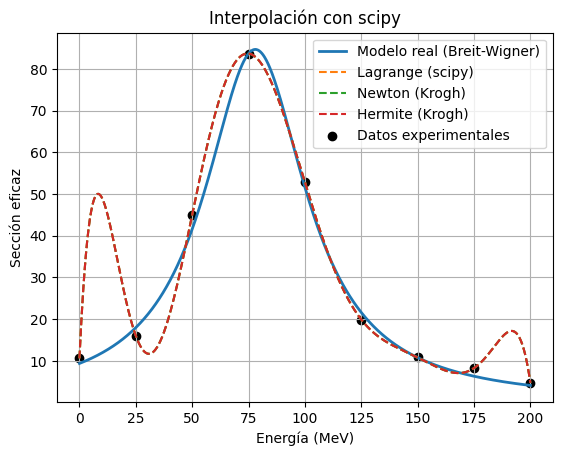

Error máximo Lagrange (scipy): 3.414916409680444
Error máximo Newton (Krogh):   3.4149164096737508
Error máximo Hermite (Krogh):  3.4149164096737508


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, KroghInterpolator, BarycentricInterpolator

energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.7, 52.8, 19.9, 10.8, 8.25, 4.7])

Er = 78
Gamma = 55

def modelo(E):
    return 1 / ((E - Er)**2 + (Gamma**2)/4)

sigma0 = max(sigma_exp) / modelo(energia[np.argmax(sigma_exp)])

def f_real(E):
    return sigma0 / ((E - Er)**2 + (Gamma**2)/4)

# los metodos de interpolacion lo usaremos con scipy

pol_lagrange = lagrange(energia, sigma_exp)

pol_newton = KroghInterpolator(energia, sigma_exp)

pol_hermite = KroghInterpolator(energia, sigma_exp)

x_vals = np.linspace(0, 200, 1000)
y_real = f_real(x_vals)
y_lagrange = pol_lagrange(x_vals)
y_newton = pol_newton(x_vals)
y_hermite = pol_hermite(x_vals)

plt.plot(x_vals, y_real, label='Modelo real (Breit-Wigner)', linewidth=2)
plt.plot(x_vals, y_lagrange, '--', label='Lagrange (scipy)')
plt.plot(x_vals, y_newton, '--', label='Newton (Krogh)')
plt.plot(x_vals, y_hermite, '--', label='Hermite (Krogh)')
plt.scatter(energia, sigma_exp, color='black', label='Datos experimentales')
plt.xlabel('Energía (MeV)')
plt.ylabel('Sección eficaz')
plt.title('Interpolación con scipy')
plt.legend()
plt.grid()
plt.show()

real_vals = f_real(energia)
err_lagrange = np.max(np.abs(real_vals - pol_lagrange(energia)))
err_newton = np.max(np.abs(real_vals - pol_newton(energia)))
err_hermite = np.max(np.abs(real_vals - pol_hermite(energia)))

print("Error máximo Lagrange (scipy):", err_lagrange)
print("Error máximo Newton (Krogh):  ", err_newton)
print("Error máximo Hermite (Krogh): ", err_hermite)

#newton y hermite tienen menor erro lagrange es menos preciso por los pocos puntos


# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

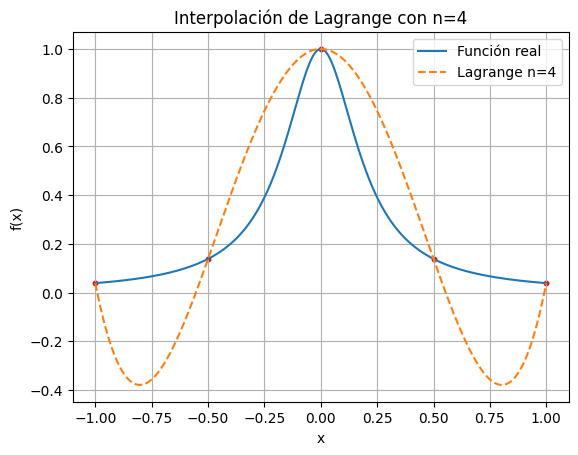

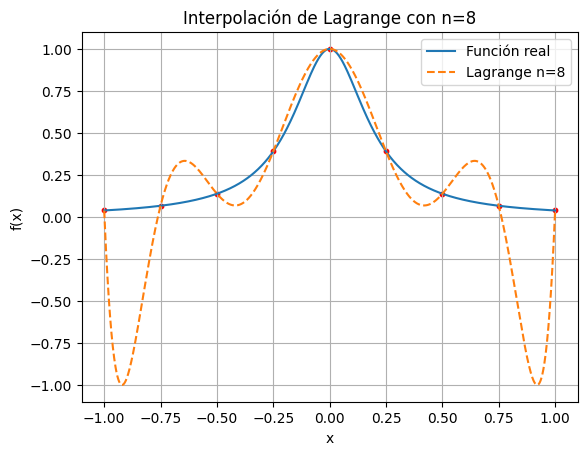

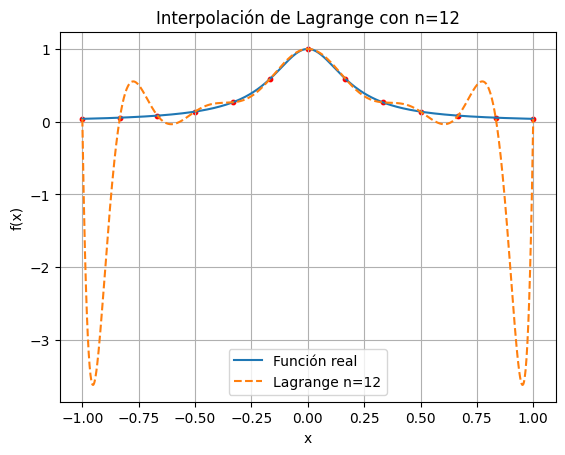

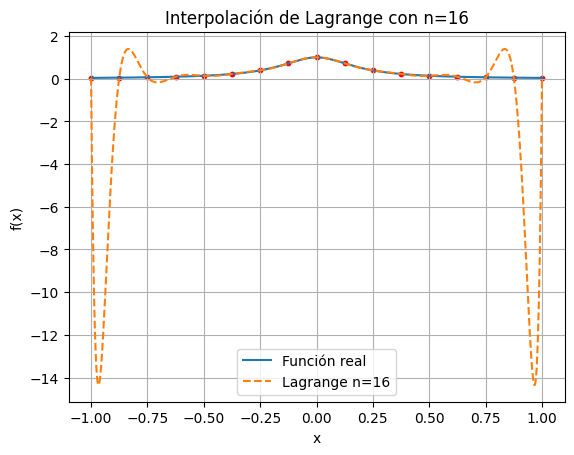

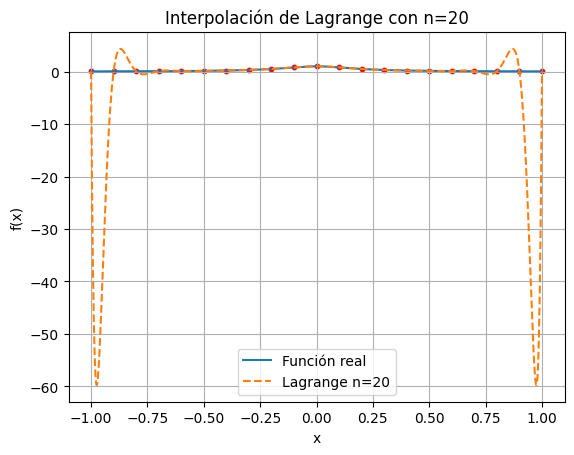

Derivada quinta en x=0.5: -744.826210336162
Cota de error estimada: 0


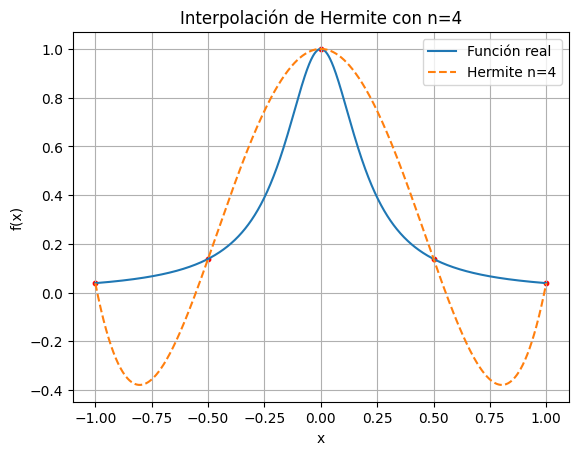

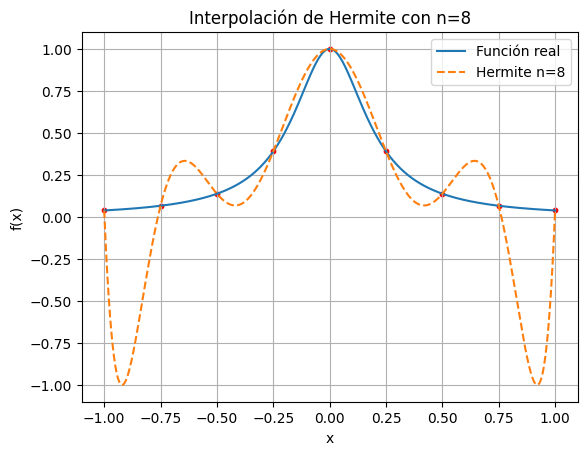

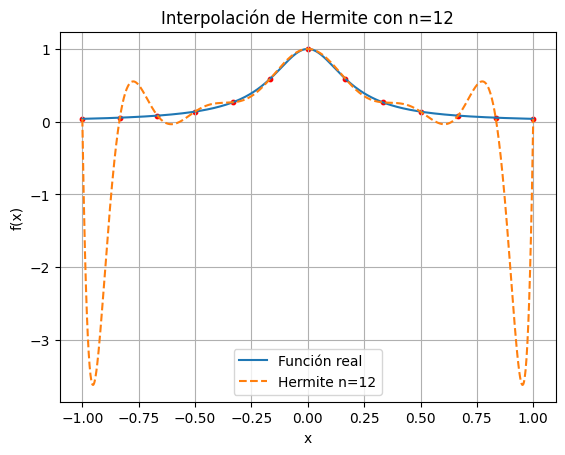

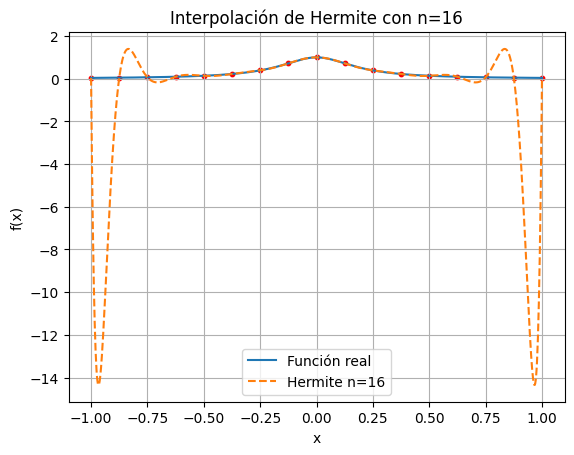

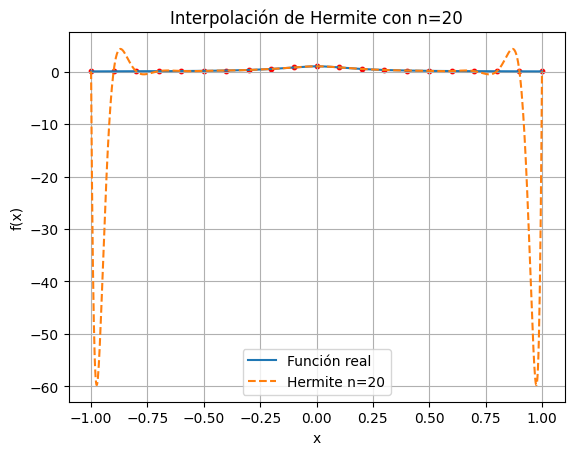

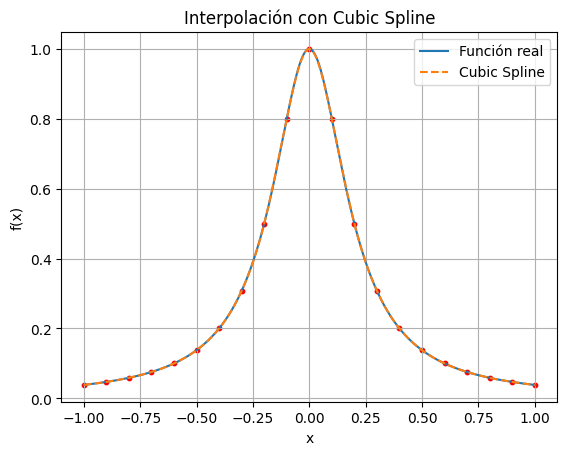

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, KroghInterpolator, CubicSpline
import sympy as sp

# Función original
def f(x):
    return 1 / (1 + 25 * x**2)

# Parte 1: Interpolación de Lagrange
n_vals = [4, 8, 12, 16, 20]
x_plot = np.linspace(-1, 1, 1000)
f_plot = f(x_plot)

for n in n_vals:
    x_nodes = np.linspace(-1, 1, n + 1)
    y_nodes = f(x_nodes)
    pol_lagrange = lagrange(x_nodes, y_nodes)

    y_interp = pol_lagrange(x_plot)

    plt.plot(x_plot, f_plot, label='Función real')
    plt.plot(x_plot, y_interp, '--', label=f'Lagrange n={n}')
    plt.scatter(x_nodes, y_nodes, color='red', s=10)
    plt.title(f'Interpolación de Lagrange con n={n}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.legend()
    plt.show()

# Parte 2: Error teórico con sympy para n = 4 en x = 0.5
x = sp.Symbol('x')
f_sym = 1 / (1 + 25 * x**2)
f_5 = sp.diff(f_sym, x, 5)
f_5_val = f_5.subs(x, 0.5)
print("Derivada quinta en x=0.5:", f_5_val.evalf())

# Cálculo del producto (x - x0)(x - x1)...(x - xn)
n = 4
x_nodes = np.linspace(-1, 1, n + 1)
producto = 1
for xi in x_nodes:
    producto *= (0.5 - xi)

error = abs(f_5_val.evalf()) * abs(producto) / math.factorial(n + 1)
print("Cota de error estimada:", error)

# Parte 3: Hermite
for n in n_vals:
    x_nodes = np.linspace(-1, 1, n + 1)
    y_nodes = f(x_nodes)
    hermite_pol = KroghInterpolator(x_nodes, y_nodes)
    y_interp = hermite_pol(x_plot)

    plt.plot(x_plot, f_plot, label='Función real')
    plt.plot(x_plot, y_interp, '--', label=f'Hermite n={n}')
    plt.scatter(x_nodes, y_nodes, color='red', s=10)
    plt.title(f'Interpolación de Hermite con n={n}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.legend()
    plt.show()

# Parte 4: Interpolación con CubicSpline
x_nodes = np.linspace(-1, 1, 21)
y_nodes = f(x_nodes)
cs = CubicSpline(x_nodes, y_nodes)
y_cs = cs(x_plot)

plt.plot(x_plot, f_plot, label='Función real')
plt.plot(x_plot, y_cs, '--', label='Cubic Spline')
plt.scatter(x_nodes, y_nodes, color='red', s=10)
plt.title('Interpolación con Cubic Spline')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

#CubicSpline es el mejor método en este caso tiene menor error, se adapta bien a los datos y no oscila

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

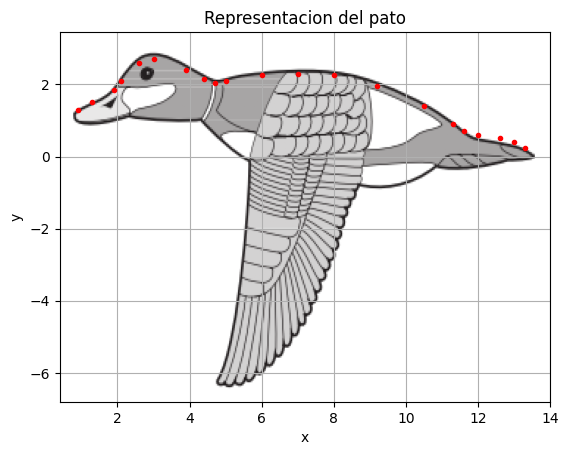

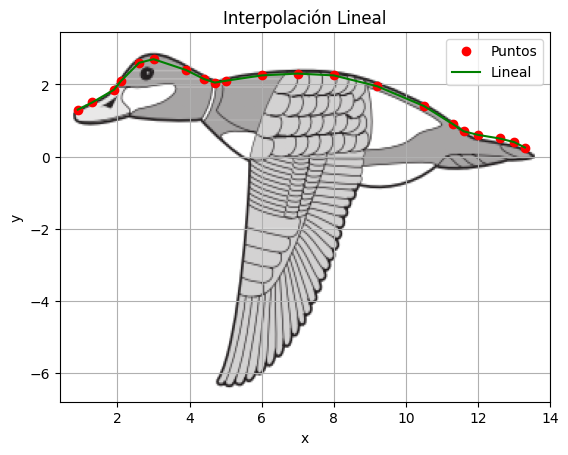

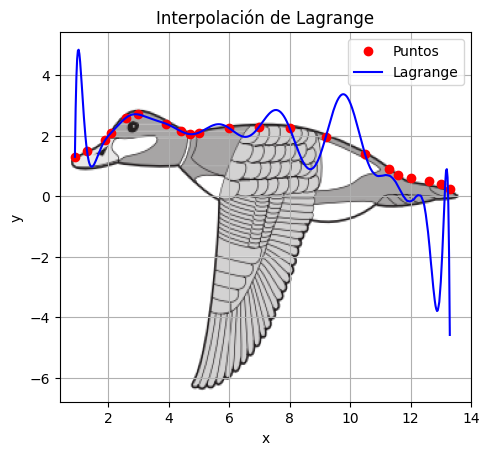

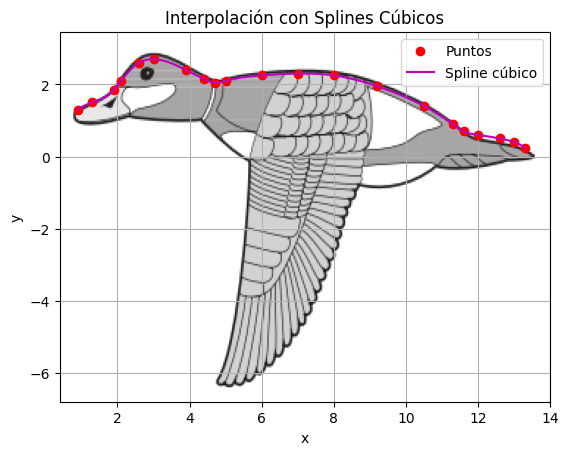

In [18]:
import urllib.request
import matplotlib.pyplot as plt # Make sure matplotlib is also imported as it's used here

pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# 4. Interpolación lineal
plt.figure()
plt.title('Interpolación Lineal')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, 'ro', label='Puntos')
plt.plot(xp, yp, 'g-', label='Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

# 5. Interpolación de Lagrange
pol_lagrange = lagrange(xp, yp)
x_l = np.linspace(min(xp), max(xp), 500)
y_l = pol_lagrange(x_l)

plt.figure()
plt.title('Interpolación de Lagrange')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, 'ro', label='Puntos')
plt.plot(x_l, y_l, 'b-', label='Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

# 6. Interpolación con Splines cúbicos
spl = CubicSpline(xp, yp)
x_s = np.linspace(min(xp), max(xp), 500)
y_s = spl(x_s)

plt.figure()
plt.title('Interpolación con Splines Cúbicos')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, 'ro', label='Puntos')
plt.plot(x_s, y_s, 'm-', label='Spline cúbico')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

#Sí, la interpolación de Lagrange presenta oscilaciones, sobre todo en los extremos del dominio.
#Esto se puede ver en la gráfica donde la curva se mueve bruscamente hacia arriba y hacia abajo en algunas partes, alejándose de los puntos reales.


# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [11]:
import numpy as np
from scipy.interpolate import CubicSpline
import sympy as sp

x = [-1, 0, 1, 2]
y = [5, 3, 3, 4]

spline = CubicSpline(x, y)

valor = spline(1.5)
print("El valor del spline en x = 1.5 es:", valor)
x_sym = sp.Symbol('x')

for i in range(len(x) - 1):
    c0 = spline.c[0][i]
    c1 = spline.c[1][i]
    c2 = spline.c[2][i]
    c3 = spline.c[3][i]
    tramo = c0*(x_sym - x[i])**3 + c1*(x_sym - x[i])**2 + c2*(x_sym - x[i]) + c3
    print(f"Tramo {i} entre {x[i]} y {x[i+1]}: {sp.simplify(tramo)}")


El valor del spline en x = 1.5 es: 3.4375
Tramo 0 entre -1 y 0: -0.166666666666666*x**3 + 1.0*x**2 - 0.833333333333333*x + 3.0
Tramo 1 entre 0 y 1: -0.166666666666667*x**3 + 1.0*x**2 - 0.833333333333333*x + 3.0
Tramo 2 entre 1 y 2: -0.166666666666667*x**3 + 1.0*x**2 - 0.833333333333333*x + 3.0
